### 数据可视化作业 (matplotlib)

蒙晓锋  
中国科学院大学  
2023年12月15日

In [1]:
# 导入包
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### 练习1: 航班乘客变化分析
1. 分析年度乘客总量的变化情况
2. 分析乘客量在一年中12个月份的分布

In [2]:
data = sns.load_dataset("flights") # 导航班乘客数据
data.head()
# 年份, 月份, 乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


* 练习1  问题1  折线图

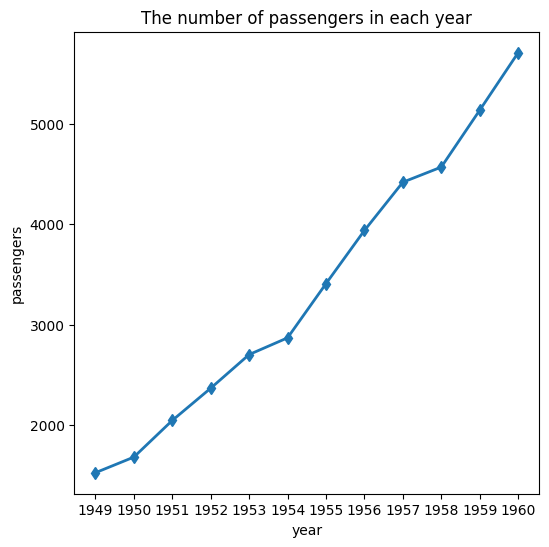

In [3]:
'''练习1  问题1  折线图'''
# 数据处理
data_year_sum = data.groupby('year').agg({'passengers':'sum'}) # 计算每一年的乘客总量

# 画图
fig, ax = plt.subplots()

fig.set_size_inches(6, 6) # 设置图像大小
ax.plot(data_year_sum.index, data_year_sum.passengers, linewidth=2.0, marker='d')
ax.set_xticks(data_year_sum.index) # 设置坐标轴刻度
plt.grid(False) # 去除图像背景网格
plt.xlabel("year") # 设置横坐标名字
plt.ylabel("passengers") # 设置纵坐标名字
plt.title("The number of passengers in each year") # 设置图标题


plt.show()

* 练习1  问题2  柱状图

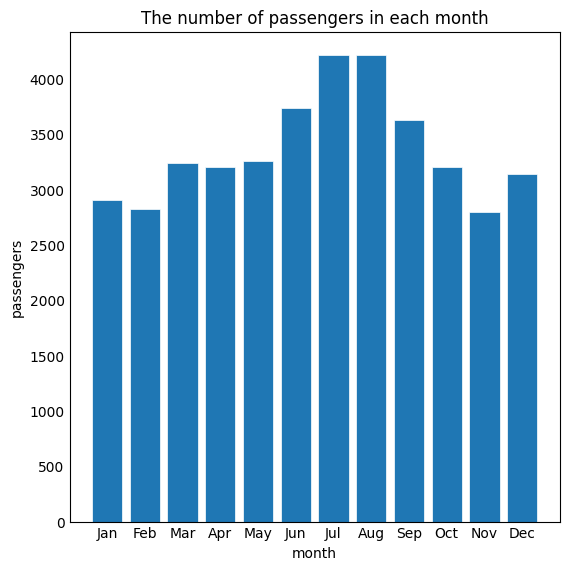

In [4]:
'''练习1  问题2  柱状图'''
# 数据处理
data_month_sum = data.groupby('month', observed=True).agg({'passengers':'sum'}) # 计算每一个月的乘客总量

# 设置绘图样式
plt.style.use('_mpl-gallery')

# 画图
fig, ax = plt.subplots()

ax.bar(data_month_sum.index, data_month_sum.passengers, linewidth=0.5, edgecolor="white")
fig.set_size_inches(5, 5) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("month") # 设置横坐标名字
plt.ylabel("passengers") # 设置纵坐标名字
plt.title("The number of passengers in each month") # 设置图标题

plt.show()

#### 练习2: 鸢尾花花型尺寸分析
1. 萼片 (sepal) 和花瓣 (petal) 的大小关系  
2. 不同种类 (species) 鸢尾花萼片和花瓣的大小关系  
3. 不同种类鸢尾花萼片和花瓣大小的分布情况

In [5]:
data = sns.load_dataset("iris") # 导入鸢尾花数据
data.head() 
# 萼片长度, 萼片宽度, 花瓣长度, 花瓣宽度, 种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* 练习2  问题1  散点图

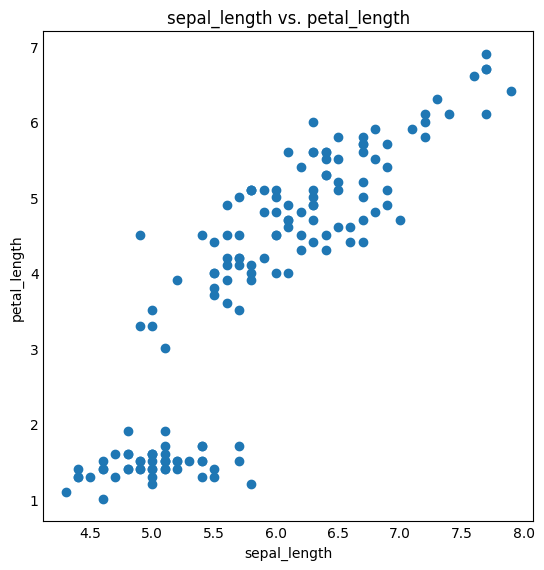

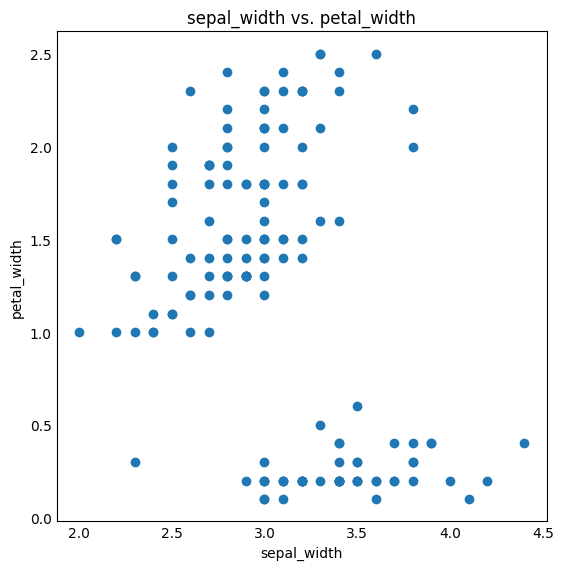

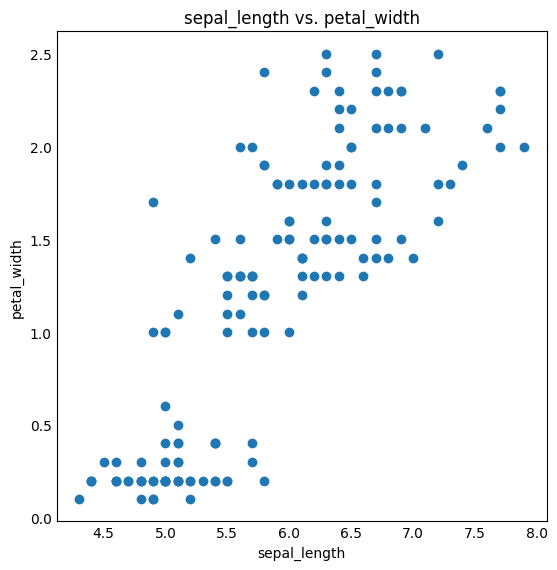

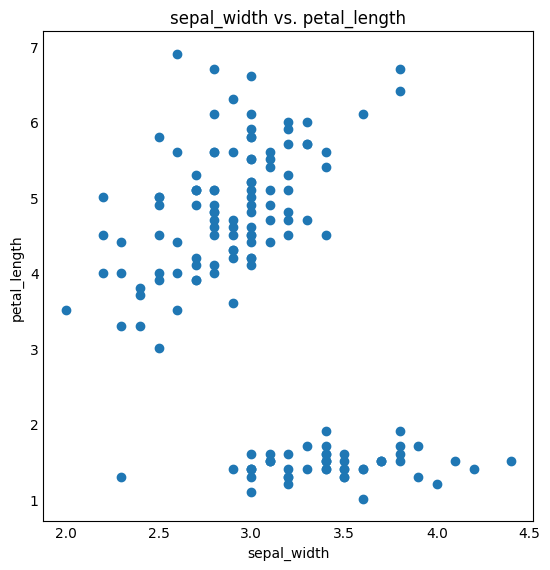

In [6]:
'''练习2  问题1  散点图'''
# 定义绘制散点图的函数
def DrawScatterFigure(x_data, y_data, x_label, y_label, title):
    # 设置绘图样式
    plt.style.use('_mpl-gallery')

    # 绘图
    fig, ax = plt.subplots()
    # plt.figure(figure_num)
    # plt.plot()
    ax.scatter(x_data, y_data)
    fig.set_size_inches(5, 5) # 设置图像大小
    plt.grid(False) # 去除图像背景网格
    plt.xlabel(x_label) # 设置横坐标名字
    plt.ylabel(y_label) # 设置纵坐标名字
    plt.title(title) # 设置图标题
    plt.show()
    

# sepal_length vs. petal_length
DrawScatterFigure(data.sepal_length, data.petal_length, "sepal_length", "petal_length", "sepal_length vs. petal_length")
# sepal_width vs. petal_width
DrawScatterFigure(data.sepal_width, data.petal_width, "sepal_width", "petal_width", "sepal_width vs. petal_width")
# sepal_length vs. petal_width
DrawScatterFigure(data.sepal_length, data.petal_width, "sepal_length", "petal_width", "sepal_length vs. petal_width")
# sepal_width vs. petal_length
DrawScatterFigure(data.sepal_width, data.petal_length, "sepal_width", "petal_length", "sepal_width vs. petal_length")

* 练习2  问题2 散点图 区分不同鸢尾花

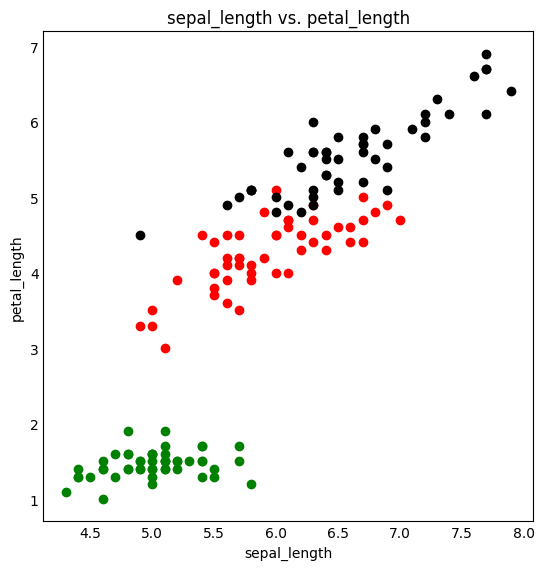

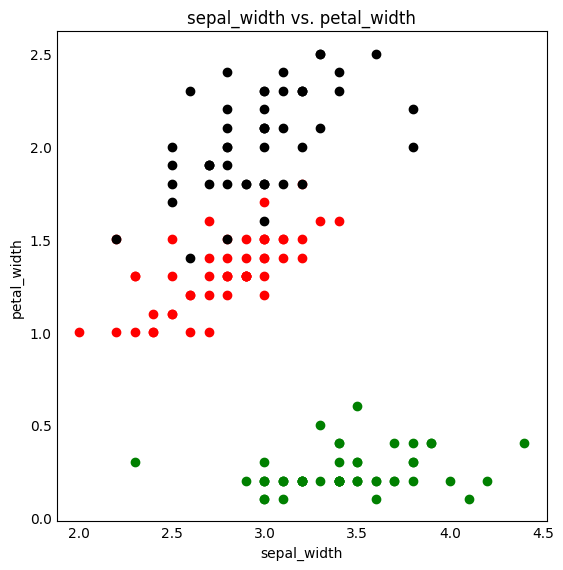

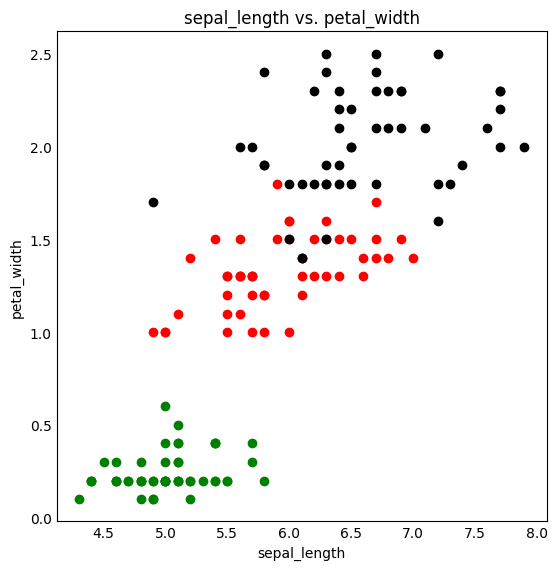

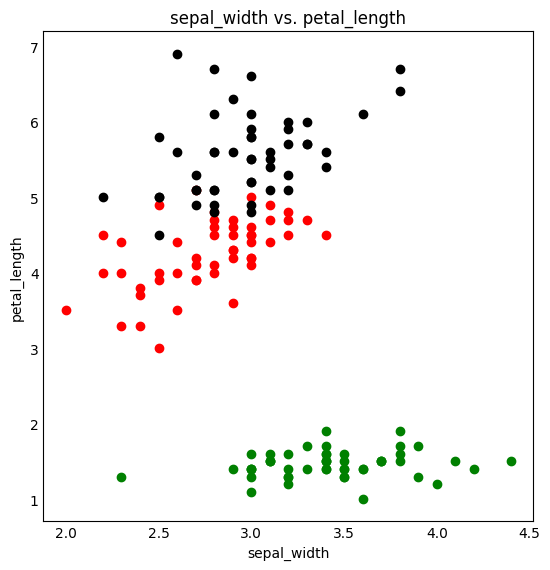

In [7]:
'''练习2  问题2 散点图 区分不同鸢尾花'''
# 定义绘制散点图的函数, 为不同鸢尾花赋值不同的标签
def ScatterFigurePlot(x_data, y_data, x_label, y_label, title):
    # 设置绘图样式
    plt.style.use('_mpl-gallery')

    # 绘图
    fig, ax = plt.subplots()
    # plt.figure(figure_num)
    # plt.plot()
    fig.set_size_inches(5, 5) # 设置图像大小
    plt.grid(False) # 去除图像背景网格
    plt.xlabel(x_label) # 设置横坐标名字
    plt.ylabel(y_label) # 设置纵坐标名字
    plt.title(title) # 设置图标题
    # plt.legend(loc="upper left") # 设置标签
    # ax.scatter(color='g', label='setosa')
    # ax.scatter(color='r', label='versicolor')
    # ax.scatter(color='k', label='virginica')
    
    # flowers = ['setosa', 'versicolor', 'virginica']
    # flower_color = ['g', 'r', 'k']
    for i in range(0, len(data.species)):
        if (data.species[i] == 'setosa'):
            ax.scatter(x_data[i], y_data[i], color='g') # 绿色点代表 setosa
        if (data.species[i] == 'versicolor'):
            ax.scatter(x_data[i], y_data[i], color='r') # 红色点代表 versicolor
        if (data.species[i] == 'virginica'):
            ax.scatter(x_data[i], y_data[i], color='k') # 黑色点代表 virginica

    plt.show()
    

# sepal_length vs. petal_length
ScatterFigurePlot(data.sepal_length, data.petal_length, "sepal_length", "petal_length", "sepal_length vs. petal_length")
# sepal_width vs. petal_width
ScatterFigurePlot(data.sepal_width, data.petal_width, "sepal_width", "petal_width", "sepal_width vs. petal_width")
# sepal_length vs. petal_width
ScatterFigurePlot(data.sepal_length, data.petal_width, "sepal_length", "petal_width", "sepal_length vs. petal_width")
# sepal_width vs. petal_length
ScatterFigurePlot(data.sepal_width, data.petal_length, "sepal_width", "petal_length", "sepal_width vs. petal_length")

* 练习2  问题3  箱式图

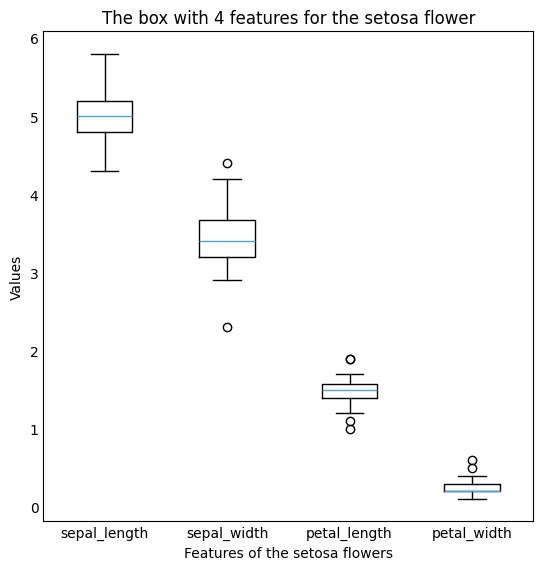

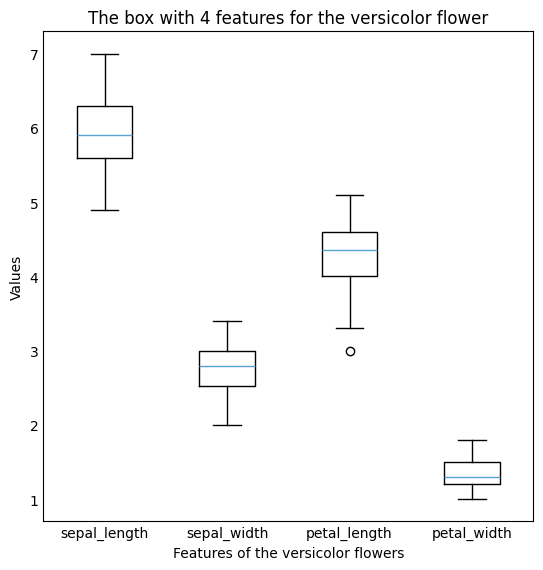

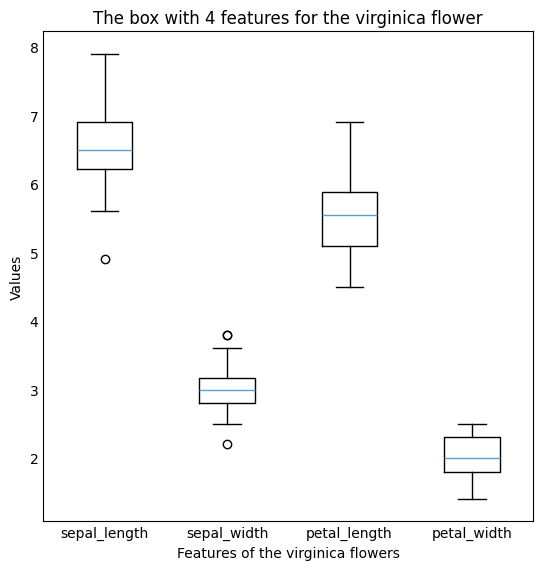

In [8]:
'''练习2  问题3  箱式图'''
# 定义箱型图绘制函数
def BoxPlot(Flower_Data, Flower):
    # 定义绘图样式
    plt.style.use('_mpl-gallery')

    # 绘图
    fig,ax = plt.subplots()
    fig.set_size_inches(5, 5) # 设置图像大小
    plt.grid(False) # 去除图像背景网格
    plt.xlabel("Features of the " + Flower +" flowers") # 设置横坐标名字
    plt.ylabel("Values") # 设置纵坐标名字
    plt.title("The box with 4 features for the " + Flower + " flower") # 设置图标题
    # ax.set_xticks([0, 2, 4 , 6]) 
    ax.boxplot(Flower_Data)
    ax.set_xticklabels(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # 设置坐标轴刻度
    
    plt.show()
    

flowers = ['setosa', 'versicolor', 'virginica'] # 数据中包含的鸢尾花类型

'''  这个提取方法有 bug
Data_setosa = pd.DataFrame(data=None, columns=data.head())
Data_versicolor = pd.DataFrame(data=None, columns=data.head())
Data_virginica = pd.DataFrame(data=None, columns=data.head())

# 循环分类不同种类的鸢尾花数据
for i in range(1, len(data.species)-1):
    if (data.species[i] == flowers[0]):
        Data_setosa = pd.concat([Data_setosa, data[1]], axis=1) # 提取 setosa 数据
    if (data.species[i] == flowers[1]): 
        Data_versicolor = pd.concat([Data_versicolor, data[1]], axis=1) # 提取 versicolor 数据
    if (data.species[i] == flowers[2]): 
        Data_virginica = pd.concat([Data_virginica, data[1]], axis=1) # 提取 virginica 数据
'''

# 数据处理
data = pd.DataFrame(data)
Data_setosa = data.loc[data['species'] == 'setosa'] # 提取 setosa 数据
Data_setosa = Data_setosa.iloc[:, :4 ] # Data_setosa 取出前面4列
Data_versicolor = data.loc[data['species'] == 'versicolor'] # 提取 versicolor 数据
Data_versicolor = Data_versicolor.iloc[:, :4] # Data_versicolor 取出前面4列
Data_virginica = data.loc[data['species'] == 'virginica'] # 提取 virginica 数据
Data_virginica = Data_virginica.iloc[:, :4 ] # Data_virginica 取出前面4列

# 绘图
BoxPlot(Data_setosa, flowers[0]) # setosa
BoxPlot(Data_versicolor, flowers[1]) # versicolor
BoxPlot(Data_virginica, flowers[2]) # virginica


#### 练习3: 餐厅小费情况分析
1. 小费与总消费之间的关系
2. 男性顾客和女性顾客, 谁更慷慨
3. 抽烟与否是否会对小费金额产生影响
4. 工作日和周末, 什么时候顾客给的小费更慷慨
5. 午饭和晚饭, 哪一顿顾客更愿意给小费
6. 就餐人数是否会对慷慨度产生影响
7. 性别 + 抽烟的组合因素对慷慨度的影响

In [9]:
data = sns.load_dataset("tips") # 导入餐厅小费数据
data.head()
# 总消费, 小费, 性别, 吸烟与否, 就餐星期, 就餐时间, 就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* 练习3  问题1  散点图 + 回归分析

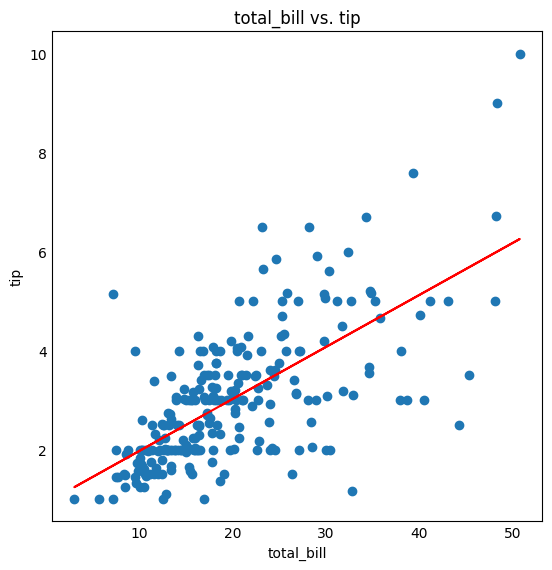

In [10]:
'''练习3  问题1  散点图 + 回归分析'''
fig, ax = plt.subplots()

fig.set_size_inches(5, 5) # 设置图像大小
ax.scatter(data.total_bill, data.tip)
plt.grid(False) # 去除图像背景网格
plt.xlabel("total_bill") # 设置横坐标名字
plt.ylabel("tip") # 设置纵坐标名字
plt.title("total_bill vs. tip") # 设置图标题
# 线性回归
slope, intercept = np.polyfit(data.total_bill, data.tip, 1) # 计算回归系数
plt.plot(data.total_bill, slope * data.total_bill + intercept, color='red') # 绘制拟合曲线

plt.show()

* 练习3  问题2  箱图

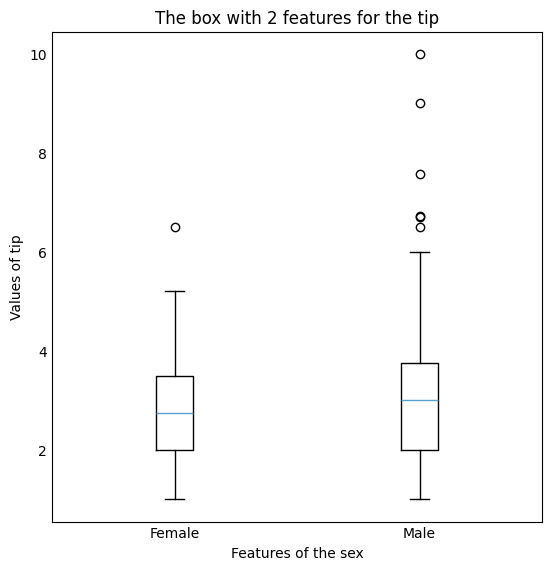

In [11]:
'''练习3  问题2  箱图'''
# 数据处理
data = pd.DataFrame(data)
Data_Male = data.loc[data['sex'] == 'Male'] # 提取 Male 数据
Data_Female = data.loc[data['sex'] == 'Female'] # 提取 Female 数据


# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig,ax = plt.subplots()
fig.set_size_inches(5, 5) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of the sex") # 设置横坐标名字
plt.ylabel("Values of tip") # 设置纵坐标名字
plt.title("The box with 2 features for the tip") # 设置图标题
ax.boxplot([Data_Female.tip, Data_Male.tip])
ax.set_xticklabels(['Female', 'Male']) # 设置横坐标刻度值
  
plt.show()

* 练习3  问题3  箱图

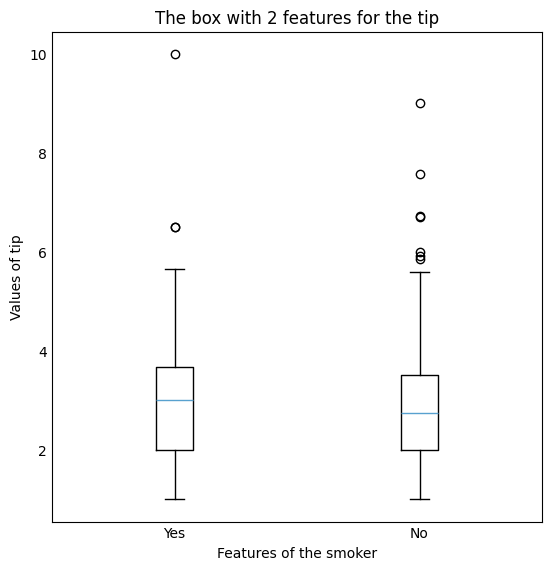

In [12]:
'''练习3  问题3  箱图'''
# 数据处理
data = pd.DataFrame(data)
Data_Yes = data.loc[data['smoker'] == 'Yes'] # 提取 smoker 数据
Data_No = data.loc[data['smoker'] == 'No'] # 提取 no smoker 数据


# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig,ax = plt.subplots()
fig.set_size_inches(5, 5) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of the smoker") # 设置横坐标名字
plt.ylabel("Values of tip") # 设置纵坐标名字
plt.title("The box with 2 features for the tip") # 设置图标题
ax.boxplot([Data_Yes.tip, Data_No.tip])
ax.set_xticklabels(['Yes', 'No']) # 设置横坐标刻度值
  
plt.show()

* 练习3  问题4  箱图

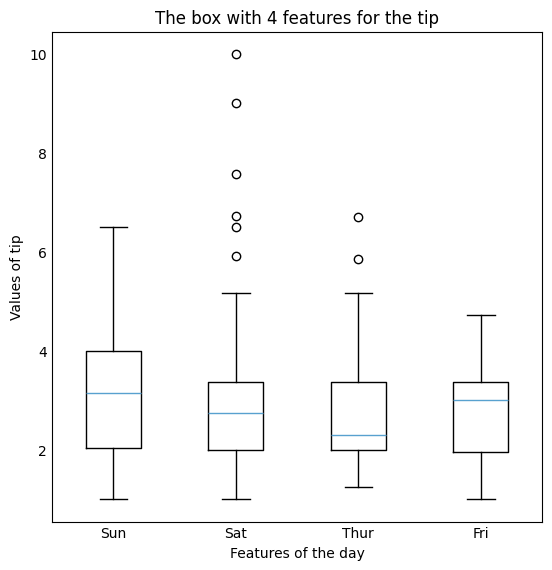

In [13]:
'''练习3  问题4  箱图'''
# 数据处理
data = pd.DataFrame(data)
Data_Sun = data.loc[data['day'] == 'Sun'] # 提取 Sun 数据
Data_Sat = data.loc[data['day'] == 'Sat'] # 提取 Sat 数据
Data_Thur = data.loc[data['day'] == 'Thur'] # 提取 Thur 数据
Data_Fri = data.loc[data['day'] == 'Fri'] # 提取 Fri 数据


# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig,ax = plt.subplots()
fig.set_size_inches(5, 5) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of the day") # 设置横坐标名字
plt.ylabel("Values of tip") # 设置纵坐标名字
plt.title("The box with 4 features for the tip") # 设置图标题
ax.boxplot([Data_Sun.tip, Data_Sat.tip, Data_Thur.tip, Data_Fri.tip])
ax.set_xticklabels(['Sun', 'Sat', 'Thur', 'Fri']) # 设置横坐标刻度值
  
plt.show()

* 练习3  问题5  箱图

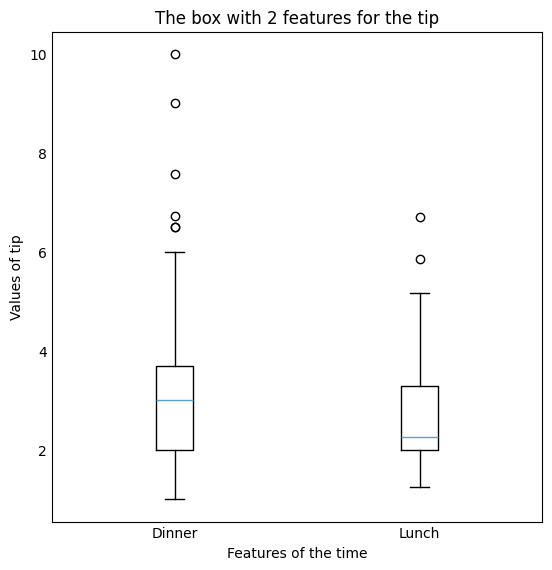

In [14]:
'''练习3  问题5  箱图'''
# 数据处理
data = pd.DataFrame(data)
Data_Dinner = data.loc[data['time'] == 'Dinner'] # 提取 Dinner 数据
Data_Lunch = data.loc[data['time'] == 'Lunch'] # 提取 Lunch 数据

# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig,ax = plt.subplots()
fig.set_size_inches(5, 5) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of the time") # 设置横坐标名字
plt.ylabel("Values of tip") # 设置纵坐标名字
plt.title("The box with 2 features for the tip") # 设置图标题
ax.boxplot([Data_Dinner.tip, Data_Lunch.tip])
ax.set_xticklabels(['Dinner', 'Lunch']) # 设置横坐标刻度值
  
plt.show()

* 练习3  问题6  箱图

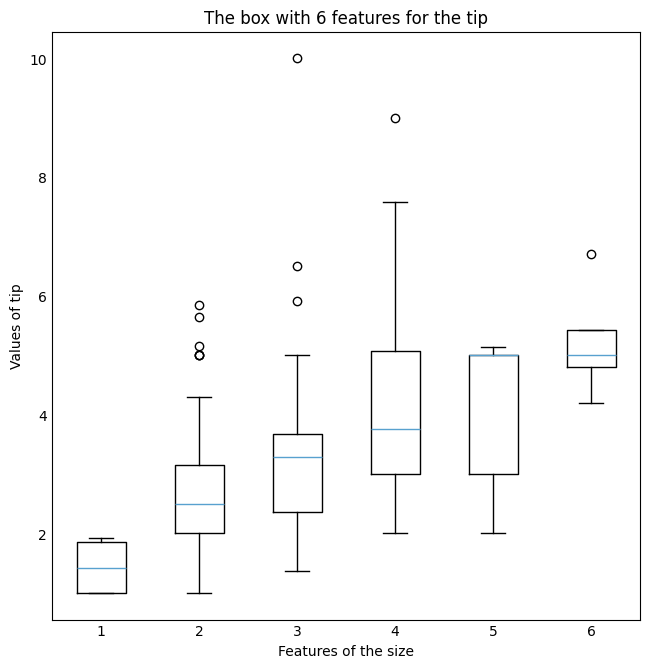

In [15]:
'''练习3  问题6  箱图'''
# 数据处理
data = pd.DataFrame(data)
Data_Size_1 = data.loc[data['size'] == 1] # 提取就餐人数1人的数据
Data_Size_2 = data.loc[data['size'] == 2] # 提取就餐人数2人的数据
Data_Size_3 = data.loc[data['size'] == 3] # 提取就餐人数3人的数据
Data_Size_4 = data.loc[data['size'] == 4] # 提取就餐人数4人的数据
Data_Size_5 = data.loc[data['size'] == 5] # 提取就餐人数5人的数据
Data_Size_6 = data.loc[data['size'] == 6] # 提取就餐人数6人的数据


# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig,ax = plt.subplots()
fig.set_size_inches(6, 6) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of the size") # 设置横坐标名字
plt.ylabel("Values of tip") # 设置纵坐标名字
plt.title("The box with 6 features for the tip") # 设置图标题
ax.boxplot([Data_Size_1.tip, Data_Size_2.tip, Data_Size_3.tip, Data_Size_4.tip, Data_Size_5.tip, Data_Size_6.tip])
ax.set_xticklabels(['1', '2', '3', '4', '5', '6']) # 设置横坐标刻度值
  
plt.show()

* 练习3  问题7  统计柱状图

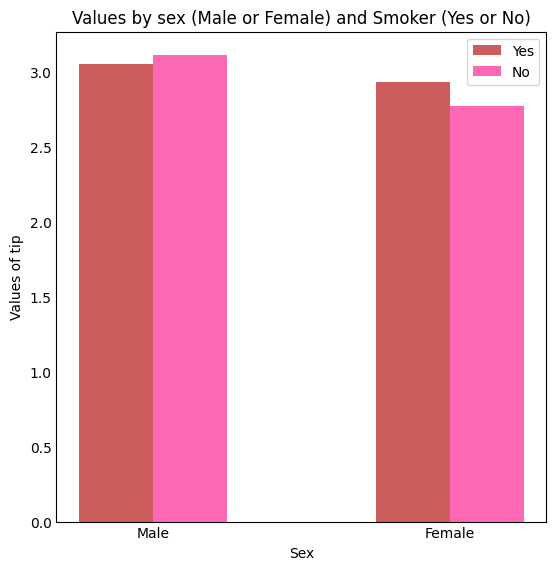

In [16]:
'''练习3  问题7  统计柱状图'''
# 数据处理
data = pd.DataFrame(data)
# Data_Male = data.loc[data['sex'] == 'Male'] # 提取 Male 数据
# Data_Female = data.loc[data['sex'] == 'Female'] # 提取 Female 数据
Data_Male_Yes = data.loc[(data['smoker'] == 'Yes') & (data['sex'] == 'Male')] # 提取 Male smoker 数据
Data_Male_No = data.loc[(data['smoker'] == 'No') & (data['sex'] == 'Male')] # 提取 Male no smoker 数据
Data_Female_Yes = data.loc[(data['smoker'] == 'Yes') & (data['sex'] == 'Female')] # 提取 Female smoker 数据
Data_Female_No = data.loc[(data['smoker'] == 'No') & (data['sex'] == 'Female')] # 提取 Female no smoker 数据

''' 
# 这里的 groupby 用法错误
Data_Male_Yes = Data_Yes.groupby('sex' == 'Male').agg({'tip':'mean'})
Data_Male_No = Data_No.groupby('sex' == 'Male').agg({'tip':'mean'})
Data_Female_Yes = Data_No.groupby('sex' == 'Female').agg({'tip':'mean'})
Data_Female_No = Data_No.groupby('sex' == 'Female').agg({'tip':'mean'})
'''

data_yes = [Data_Male_Yes.tip.mean(), Data_Female_Yes.tip.mean()]
data_no = [Data_Male_No.tip.mean(), Data_Female_No.tip.mean()]

# 定义绘图样式
plt.style.use('_mpl-gallery')

# 画图
fig,ax = plt.subplots()
fig.set_size_inches(5, 5) # 设置图像大小
labels = ['Male', 'Female'] # 纵坐标标签
x = np.arange(len(labels)) # x 轴刻度坐标位置
width = 0.25 # 柱子宽度
# 计算每个柱子在 x 轴上的位置, 保证 x 轴刻度标签居中
# x - wdith/2, x + width/2 即每组数据在 X 轴上的位置
ax.bar(x - width/2, data_yes, width, color='indianred', label='Yes') # 绘制吸烟的人的柱
ax.bar(x + width/2, data_no, width, color='hotpink', label='No')
plt.xticks([0, 1], ["Male", "Female"]) # 设置横坐标刻度标签
plt.grid(False) # 去除图像背景网格
plt.xlabel("Sex") # 设置横坐标名称
plt.ylabel("Values of tip") # 设置纵坐标名称
plt.title("Values by sex (Male or Female) and Smoker (Yes or No)") # 设置图标题
plt.legend() # 显示图标
plt.show()

#### 练习4: 泰坦尼克号海难幸存状况分析
1. 不同舱位等级中幸存和遇难的乘客比例
2. 不同性别的幸存比例
3. 幸存和遇难乘客的票价分布
4. 幸存和遇难乘客的年龄分布
5. 不同上船港口的乘客舱位等级分布
6. 幸存和遇难乘客堂兄弟姐妹的数量分布
7. 幸存和遇难乘客父母子女的数量分布
8. 单独乘船与否和幸存之间有没有联系

In [17]:
data = sns.load_dataset("titanic") # 导入泰坦尼克号遇难者数据
data.head()
# 幸存与否, 舱位等级, 性别, 年龄, 堂兄弟姐妹数, 父母子女数, 上船港口缩写

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 练习4  问题1  堆叠统计柱状图

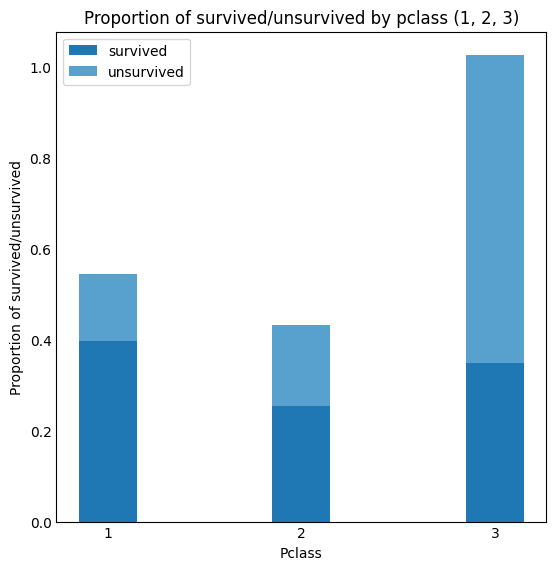

In [18]:
'''练习4  问题1  堆叠统计柱状图'''
## 数据处理
survived = data.loc[data['alive'] == 'yes'] # 计算存活的人数
unsurvived = data.loc[data['alive'] == 'no'] # 计算为存活人数
# pclass1
pclass1_survived = data.loc[(data['pclass'] == 1) & (data['alive'] == 'yes')] # 提取pclass1存活的数据
pclass1_unsurvived = data.loc[(data['pclass'] == 1) & (data['alive'] == 'no')] # 提取pclass1未存活的数据
# pclass1_total = len(pclass1_survived) + len(pclass1_unsurvived) # 计算pclass1总人数
# pclass1_survived_pro = len(pclass1_survived) / pclass1_total # 计算pclass1存活率
# pclass1_unsurvived_pro = len(pclass1_unsurvived) / pclass1_total # 计算pclass1死亡率
pclass1_survived_pro = len(pclass1_survived) / len(survived)
pclass1_unsurvived_pro = len(pclass1_unsurvived) / len(unsurvived)
# pclass2
pclass2_survived = data.loc[(data['pclass'] == 2) & (data['alive'] == 'yes')]
pclass2_unsurvived = data.loc[(data['pclass'] == 2) & (data['alive'] == 'no')]
# pclass2_total = len(pclass2_survived) + len(pclass2_unsurvived)
# pclass2_survived_pro = len(pclass2_survived) / pclass2_total
# pclass2_unsurvived_pro = len(pclass2_unsurvived) / pclass2_total
pclass2_survived_pro = len(pclass2_survived) / len(survived)
pclass2_unsurvived_pro = len(pclass2_unsurvived) / len(unsurvived)
# pclass3
pclass3_survived = data.loc[(data['pclass'] == 3) & (data['alive'] == 'yes')]
pclass3_unsurvived = data.loc[(data['pclass'] == 3) & (data['alive'] == 'no')]
# pclass3_total = len(pclass3_survived) + len(pclass3_unsurvived)
# pclass3_survived_pro = len(pclass3_survived) / pclass3_total
# pclass3_unsurvived_pro = len(pclass3_unsurvived) / pclass3_total
pclass3_survived_pro = len(pclass3_survived) / len(survived)
pclass3_unsurvived_pro = len(pclass3_unsurvived) / len(unsurvived)

survived_pro = [pclass1_survived_pro, pclass2_survived_pro, pclass3_survived_pro]
unsurvived_pro = [pclass1_unsurvived_pro, pclass2_unsurvived_pro, pclass3_unsurvived_pro]

## 绘图
labels = ["1", "2", "3"]
width = 0.3
fig, ax = plt.subplots()
fig.set_size_inches(5, 5) # 设置图像大小
ax.bar(labels, survived_pro, width, label='survived')
ax.bar(labels, unsurvived_pro, width, bottom=survived_pro, label='unsurvived')
plt.grid(False) # 去除图像背景网格
plt.xlabel("Pclass") # 设置横坐标名称
plt.ylabel("Proportion of survived/unsurvived") # 设置纵坐标名称
plt.title("Proportion of survived/unsurvived by pclass (1, 2, 3)") # 设置图标题
plt.legend() # 显示图标
plt.show()



* 练习4  问题2  堆叠统计柱状图

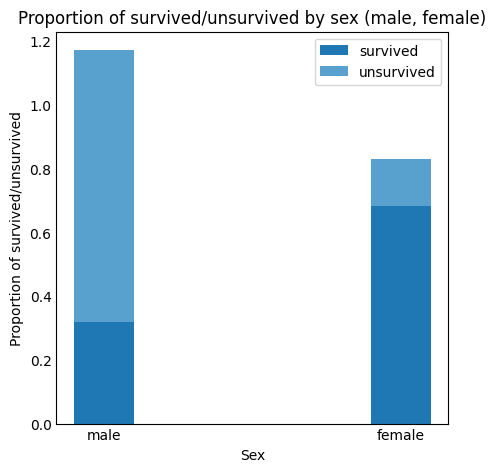

In [19]:
'''练习4  问题2  堆叠统计柱状图'''
## 数据处理
survived = data.loc[data['alive'] == 'yes'] # 计算存活的人数
unsurvived = data.loc[data['alive'] == 'no'] # 计算为存活人数
# male
male_survived = data.loc[(data['sex'] == 'male') & (data['alive'] == 'yes')] # 提取male存活的数据
male_unsurvived = data.loc[(data['sex'] == 'male') & (data['alive'] == 'no')] # 提取pclass1未存活的数据
# male_total = len(male_survived) + len(male_unsurvived) # 计算male总人数
# male_survived_pro = len(male_survived) / male_total # 计算male存活率
# male_unsurvived_pro = len(male_unsurvived) / male_total # 计算male死亡率
male_survived_pro = len(male_survived) / len(survived)
male_unsurvived_pro = len(male_unsurvived) / len(unsurvived)
# female
female_survived = data.loc[(data['sex'] == 'female') & (data['alive'] == 'yes')] # 提取male存活的数据
female_unsurvived = data.loc[(data['sex'] == 'female') & (data['alive'] == 'no')] # 提取pclass1未存活的数据
# female_total = len(female_survived) + len(female_unsurvived) # 计算male总人数
# female_survived_pro = len(female_survived) / female_total # 计算male存活率
# female_unsurvived_pro = len(female_unsurvived) / female_total # 计算male死亡率
female_survived_pro = len(female_survived) / len(survived)
female_unsurvived_pro = len(female_unsurvived) / len(unsurvived)

survived_pro = [male_survived_pro, female_survived_pro]
unsurvived_pro = [male_unsurvived_pro, female_unsurvived_pro]

## 绘图
labels = ["male", "female"]
width = 0.2
fig, ax = plt.subplots()
fig.set_size_inches(4, 4) # 设置图像大小
ax.bar(labels, survived_pro, width, label='survived')
ax.bar(labels, unsurvived_pro, width, bottom=survived_pro, label='unsurvived')
plt.grid(False) # 去除图像背景网格
plt.xlabel("Sex") # 设置横坐标名称
plt.ylabel("Proportion of survived/unsurvived") # 设置纵坐标名称
plt.title("Proportion of survived/unsurvived by sex (male, female)") # 设置图标题
plt.legend() # 显示图标
plt.show()

* 练习4  问题3  箱图

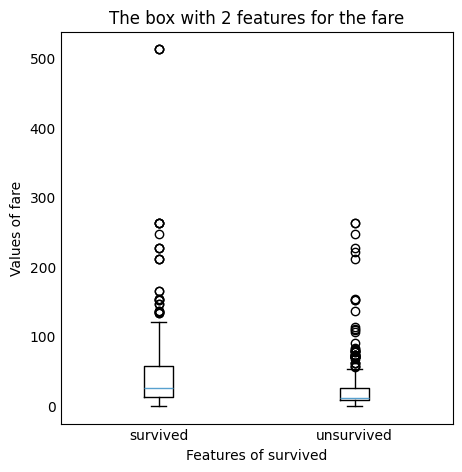

In [20]:
'''练习4  问题3  箱图'''
# 数据处理
data = pd.DataFrame(data)
survived = data.loc[data['alive'] == 'yes'] # 提取存活的数据
unsurvived = data.loc[data['alive'] == 'no'] # 提取未存活的数据


# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig, ax = plt.subplots()
fig.set_size_inches(4, 4) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of survived") # 设置横坐标名字
plt.ylabel("Values of fare") # 设置纵坐标名字
plt.title("The box with 2 features for the fare") # 设置图标题
ax.boxplot([survived.fare, unsurvived.fare])
ax.set_xticklabels(['survived', 'unsurvived']) # 设置横坐标刻度值
  
plt.show()

* 练习4  问题4  箱图

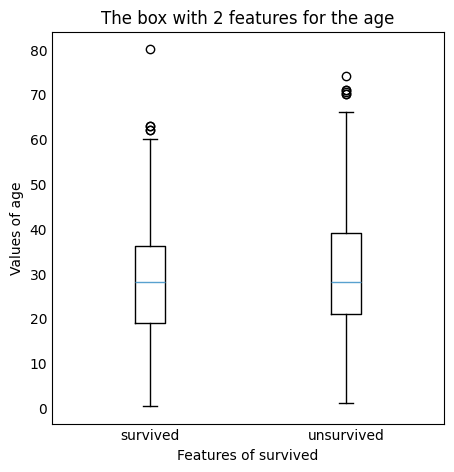

In [21]:
'''练习4  问题4  箱图'''
'''age 中有空值导致 ax.boxplot 无法计算'''
'''一定要检查数据类型, 是否缺失。'''
'''分析之前记得检查数据！！！'''
# 数据处理
survived = data.loc[data['alive'] == 'yes'] # 提取存活的数据
unsurvived = data.loc[data['alive'] == 'no'] # 提取未存活的数据
survived = survived.dropna(axis=0, subset = "age") # 丢弃 "age" 列中有缺失值的行
unsurvived = unsurvived.dropna(axis=0, subset = "age") # 丢弃 "age" 列中有缺失值的行


# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig, ax = plt.subplots()
fig.set_size_inches(4, 4) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of survived") # 设置横坐标名字
plt.ylabel("Values of age") # 设置纵坐标名字
plt.title("The box with 2 features for the age") # 设置图标题
ax.boxplot([survived.age, unsurvived.age])
ax.set_xticklabels(['survived', 'unsurvived']) # 设置横坐标刻度值
  
plt.show()

* 练习4  问题5  柱状图

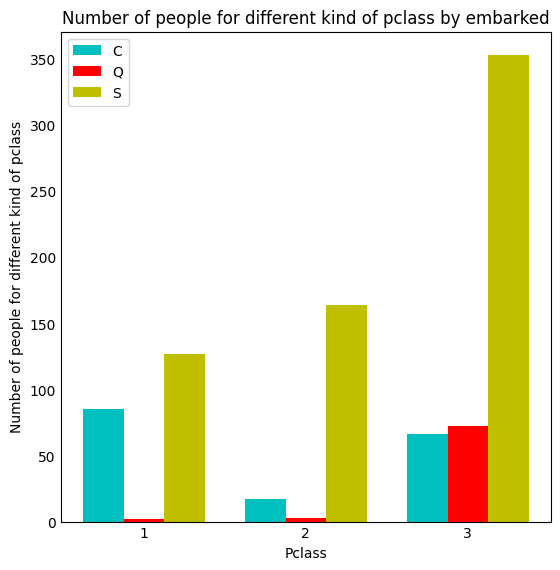

In [22]:
'''练习4  问题5  柱状图'''
## 数据处理
# pclss1
pclass1_embarked_C = data.loc[(data['pclass'] == 1) & (data['embarked'] == 'C')]
pclass1_embarked_Q = data.loc[(data['pclass'] == 1) & (data['embarked'] == 'Q')]
pclass1_embarked_S = data.loc[(data['pclass'] == 1) & (data['embarked'] == 'S')]
# pclass2
pclass2_embarked_C = data.loc[(data['pclass'] == 2) & (data['embarked'] == 'C')]
pclass2_embarked_Q = data.loc[(data['pclass'] == 2) & (data['embarked'] == 'Q')]
pclass2_embarked_S = data.loc[(data['pclass'] == 2) & (data['embarked'] == 'S')]
# pclass3
pclass3_embarked_C = data.loc[(data['pclass'] == 3) & (data['embarked'] == 'C')]
pclass3_embarked_Q = data.loc[(data['pclass'] == 3) & (data['embarked'] == 'Q')]
pclass3_embarked_S = data.loc[(data['pclass'] == 3) & (data['embarked'] == 'S')]

embarked_C = [len(pclass1_embarked_C), len(pclass2_embarked_C), len(pclass3_embarked_C)]
embarked_Q = [len(pclass1_embarked_Q), len(pclass2_embarked_Q), len(pclass3_embarked_Q)]
embarked_S = [len(pclass1_embarked_S), len(pclass2_embarked_S), len(pclass3_embarked_S)]

## 画图
plt.style.use('_mpl-gallery') # 定义绘图样式
fig, ax = plt.subplots()
fig.set_size_inches(5, 5) # 设置图像大小
labels = ['1', '2', '3'] # 纵坐标标签
x = np.arange(len(labels)) # x 轴刻度坐标位置
width = 0.25 # 柱子宽度
# 计算每个柱子在 x 轴上的位置, 保证 x 轴刻度标签居中
# x - wdith, x, x + width 即每组数据在 X 轴上的位置
ax.bar(x - width, embarked_C, width, color='c', label='C') # 绘制 embarked_C 的柱
ax.bar(x, embarked_Q, width, color='r', label='Q')
ax.bar(x + width, embarked_S, width, color='y', label='S')
plt.xticks([0, 1, 2], ["1", "2", "3"]) # 设置横坐标刻度标签
plt.grid(False) # 去除图像背景网格
plt.xlabel("Pclass") # 设置横坐标名称
plt.ylabel("Number of people for different kind of pclass") # 设置纵坐标名称
plt.title("Number of people for different kind of pclass by embarked") # 设置图标题
plt.legend() # 显示图标
plt.show()

* 练习4  问题6  箱图

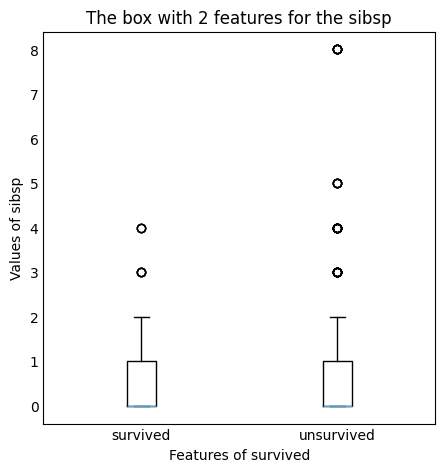

In [23]:
'''练习4  问题6  箱图'''
# 数据处理
survived = data.loc[data['alive'] == 'yes'] # 提取存活的数据
unsurvived = data.loc[data['alive'] == 'no'] # 提取未存活的数据


# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig, ax = plt.subplots()
fig.set_size_inches(4, 4) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of survived") # 设置横坐标名字
plt.ylabel("Values of sibsp") # 设置纵坐标名字
plt.title("The box with 2 features for the sibsp") # 设置图标题
ax.boxplot([survived.sibsp, unsurvived.sibsp])
ax.set_xticklabels(['survived', 'unsurvived']) # 设置横坐标刻度值
  
plt.show()

* 练习4  问题7  箱图

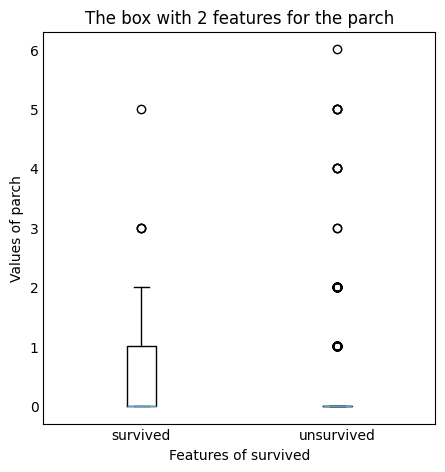

In [24]:
'''练习4  问题7  箱图'''
# 数据处理
survived = data.loc[data['alive'] == 'yes'] # 提取存活的数据
unsurvived = data.loc[data['alive'] == 'no'] # 提取未存活的数据


# 定义绘图样式
plt.style.use('_mpl-gallery')

# 绘图
fig, ax = plt.subplots()
fig.set_size_inches(4, 4) # 设置图像大小
plt.grid(False) # 去除图像背景网格
plt.xlabel("Features of survived") # 设置横坐标名字
plt.ylabel("Values of parch") # 设置纵坐标名字
plt.title("The box with 2 features for the parch") # 设置图标题
ax.boxplot([survived.parch, unsurvived.parch])
ax.set_xticklabels(['survived', 'unsurvived']) # 设置横坐标刻度值
  
plt.show()

* 练习4  问题8  统计柱状图

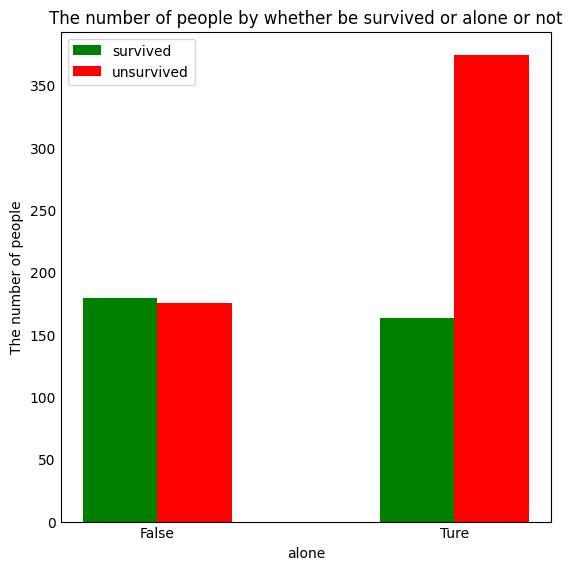

In [25]:
'''练习4  问题8  统计柱状图'''
'''alone 字段数据为 bool 值'''
# 数据处理
survived_alone = data.loc[(data['survived'] == 1) & (data['alone'] == False)] # 提取幸存且单独的数据, 1 代表幸存
survived_notalone = data.loc[(data['survived'] == 1) & (data['alone'] == True)]
unsurvived_alone = data.loc[(data['survived'] == 0) & (data['alone'] == False)]
unsurvived_notalone = data.loc[(data['survived'] == 0) & (data['alone'] == True)]

survived = [len(survived_alone), len(survived_notalone)]
unsurvived = [len(unsurvived_alone), len(unsurvived_notalone)]

# 定义绘图样式
plt.style.use('_mpl-gallery')

# 画图
fig,ax = plt.subplots()
fig.set_size_inches(5, 5) # 设置图像大小
labels = ['False', 'True'] # 纵坐标标签
x = np.arange(len(labels)) # x 轴刻度坐标位置
width = 0.25 # 柱子宽度
# 计算每个柱子在 x 轴上的位置, 保证 x 轴刻度标签居中
# x - wdith/2, x + width/2 即每组数据在 X 轴上的位置
ax.bar(x - width/2, survived, width, color='g', label='survived')
ax.bar(x + width/2, unsurvived, width, color='r', label='unsurvived')
plt.xticks([0, 1], ["False", "Ture"]) # 设置横坐标刻度标签
plt.grid(False) # 去除图像背景网格
plt.xlabel("alone") # 设置横坐标名称
plt.ylabel("The number of people") # 设置纵坐标名称
plt.title("The number of people by whether be survived or alone or not") # 设置图标题
plt.legend() # 显示图标
plt.show()